### NumPy的使用
* [学习地址](https://www.runoob.com/numpy/numpy-tutorial.html)
* [NumPy Documentation](https://numpy.org/doc/stable/contents.html)
* 安装使用 pip install numpy
* numpy的广播概念，[Broadcast](https://blog.csdn.net/kevindree/article/details/88379111)

### NumPy的基本概念
1. 他是一个强大的N维数组，ndarray
2. 他可以表示矩阵matrix和实现矩阵的各类操作
3. 他可以通过切片轻松访问数组元素
4. 可以实现线性代数、fft等常用功能
5. 是一个高效率的数学库，底层是高效的C++/Fortran代码提供支持
6. 他的内存存储是默认行优先的（row-major order），即，[1, 2, 3, 4]，通过np.array([1,2,3,4]).reshape(2, 2)后，结果矩阵是：$$ \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} $$
7. 常用的基本类型是numpy.ndarray，也就是np.array([])产生的数据类型
8. var.dtype获取其内部的数值类型，对应的类型有np.int, np.int32, np.float32, np.uint8, np.int8, np.float64等等，[见这里](https://numpy.org/doc/stable/reference/arrays.scalars.html#arrays-scalars-built-in) 和[这里](https://www.runoob.com/numpy/numpy-dtype.html)
    - 当看到dtype作为参数输入的时候，可以输入np.int，也可以输入int，还可以输入"int"，等价的
9. numpy对小数值，默认是使用float64操作的，谨记，以后存在数值转换问题
10. numpy的各种小数值乘除法也都是基于float64
11. var.shape可以获取到其维度信息，返回值是tuple
12. 维度信息如果只有行列时，通常格式是：行，列。这是因为其行排列的原因，上面提到过的
13. var.T实现矩阵的转置，仅限于2未时的操作。否则请使用transpose
14. 切片
    - var[..., ::-1]，...是忽略当前位置到第一个维度的所有维度，等价于在这之前的维度都填充了 None:None:None，也就是 var[:, :, ::-1]
    - numpy的切片操作，还支持和list选择元素一样的选择方式[begin:end:step]，基本吻合python语法，仅仅是多了...的支持
    - view返回数组的视图，修改视图维度不影响之前的数组，但是修改数据影响之前的
    - 使用v = var[...]方式获取的切片视图v，修改v内的值会改变var的结果
    - 使用v = var.copy()，建立var的副本，v和var互补影响
15. 数组（矩阵）的创建
    - np.empty(shape, dtype = float, order = 'C')，创建空矩阵，也就是内存没有被初始化的。order为优先方式可以是F，列优先。shape输入一个tuple，指定维度大小
    - np.zeros(shape, dtype = float, order = 'C')，创建0矩阵，所有值都为0
    - np.ones(shape, dtype = None, order = 'C')，创建1矩阵，全部填充为1
    - np.asarray(a, dtype = None, order = None)，把输入转换为array
    - np.array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0)，创建一个array从object上复制
    - np.frombuffer(buffer, dtype = float, count = -1, offset = 0)，把buffer理解为一个1-d的array
    - np.fromiter(iterable, dtype, count=-1)，从可迭代对象上创建一个1-d的array
    - np.arange(start, stop, step, dtype)，创建一个从start到stop具有step步长的dtype类型数组
    - np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)，创建等差数组
16. copy复制数组，复制后，修改数组不影响之前的对象
17. 改变维度
    - reshape，改变数组的维度信息，但是不改变数值和内存的内容
    - transpose，改变数组的维度信息，同时也改变数值位置，数值会发生变化
    - .T，转置，同transpose
18. numpy可以是复合类型，不止是数值，看[这里](https://www.runoob.com/numpy/numpy-sort-search.html)，可以实现行列选择，排序等
19. numpy的ndarray是iterable，可以执行迭代，类似list的使用

In [649]:
#!pip install pandas
#!pip install sklearn

### mnist数据集下载
[mnist](http://yann.lecun.com/exdb/mnist/)

In [650]:
!mkdir dataset
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz --output-document=dataset/train-images-idx3-ubyte.gz
!gzip -d dataset/train-images-idx3-ubyte.gz 

!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz --output-document=dataset/train-labels-idx1-ubyte.gz
!gzip -d dataset/train-labels-idx1-ubyte.gz 

!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz --output-document=dataset/t10k-images-idx3-ubyte.gz
!gzip -d dataset/t10k-images-idx3-ubyte.gz

!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz --output-document=dataset/t10k-labels-idx1-ubyte.gz
!gzip -d dataset/t10k-labels-idx1-ubyte.gz

mkdir: dataset: File exists
--2020-11-26 22:09:34--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
正在解析主机 yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.28.7.204, 104.28.6.204
正在连接 yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度：9912422 (9.5M) [application/x-gzip]
正在保存至: “dataset/train-images-idx3-ubyte.gz”

aset/train-images-i  10%[=>                  ]   1011K   208KB/s  剩余 47s       ^C
dataset/train-images-idx3-ubyte already exists -- do you wish to overwrite (y or n)? ^C
--2020-11-26 22:10:21--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
正在解析主机 yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.28.7.204, 104.28.6.204
正在连接 yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度：28881 (28K) [application/x-gzip]
正在保存至: “dataset/train-labels-idx1-ubyte.gz”

dataset/train-label 100%[===================>]  28.20K   112KB/s  用时 0.3s      

2020-11-26 22:10:21 (112 KB/s) - 已

In [618]:
import numpy as np
import struct
import random
import matplotlib.pyplot as plt
import pandas as pd
import math

In [621]:
def load_labels(file):
    with open(file, "rb") as f:
        data = f.read()
    
    magic_number, num_samples = struct.unpack(">ii", data[:8])
    if magic_number != 2049:   # 0x00000801
        print(f"magic number mismatch {magic_number} != 2049")
        return None
    
    labels = np.array(list(data[8:]))
    return labels

def load_images(file):
    with open(file, "rb") as f:
        data = f.read()

    magic_number, num_samples, image_width, image_height = struct.unpack(">iiii", data[:16])
    if magic_number != 2051:   # 0x00000803
        print(f"magic number mismatch {magic_number} != 2051")
        return None
    
    image_data = np.asarray(list(data[16:]), dtype=np.uint8).reshape(num_samples, -1)
    return image_data

In [538]:
def one_hot(labels, classes):
    n = len(labels)
    output = np.zeros((n, classes), dtype=np.int32)
    for row, label in enumerate(labels):
        output[row, label] = 1
    return output

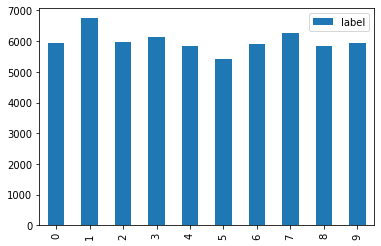

In [624]:
val_labels = load_labels("dataset/t10k-labels-idx1-ubyte")   #  10000,
val_images = load_images("dataset/t10k-images-idx3-ubyte")   #  10000, 784
numdata = val_images.shape[0] # 60000
val_images = np.hstack((val_images / 255 - 0.5, np.ones((numdata, 1))))   # 10000, 785
val_pd = pd.DataFrame(val_labels, columns=["label"])

train_labels = load_labels("dataset/train-labels-idx1-ubyte") # 60000,
train_images = load_images("dataset/train-images-idx3-ubyte") # 60000, 784
numdata = train_images.shape[0] # 60000
train_images = np.hstack((train_images / 255 - 0.5, np.ones((numdata, 1))))  # 60000, 785
train_pd = pd.DataFrame(train_labels, columns=["label"])

def show_hist(labels, num_classes):
    label_map = {key : 0 for key in range(num_classes)}
    for label in labels:
        label_map[label] += 1
        
    labels_hist = [label_map[key] for key in range(num_classes)]
    pd.DataFrame(labels_hist, columns=["label"]).plot(kind="bar")
    
show_hist(train_labels, 10)

In [625]:
train_pd.describe()

,label
count,60000.000000
mean,4.453933
std,2.889270
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


In [626]:
train_pd.value_counts()

label
1        6742
7        6265
3        6131
2        5958
9        5949
0        5923
6        5918
8        5851
4        5842
5        5421
dtype: int64

In [542]:
class Dataset:
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels
        
    # 获取他的一个item，  dataset = Dataset(),   dataset[index]
    def __getitem__(self, index):
        return self.images[index], self.labels[index]
    
    # 获取数据集的长度，个数
    def __len__(self):
        return len(self.images)

In [543]:
class DataLoaderIterator:
    def __init__(self, dataloader):
        self.dataloader = dataloader
        self.cursor = 0
        self.indexs = list(range(self.dataloader.count_data))  # 0, ... 60000
        if self.dataloader.shuffle:
            # 打乱一下
            random.shuffle(self.indexs)
            
    # 合并batch的数据
    def merge_to(self, container, b):
        if len(container) == 0:
            for index, data in enumerate(b):
                if isinstance(data, np.ndarray):
                    container.append(data)
                else:
                    container.append(np.array([data], dtype=type(data)))
        else:
            for index, data in enumerate(b):
                container[index] = np.vstack((container[index], data))
        return container
                
    def __next__(self):
        if self.cursor >= self.dataloader.count_data:
            raise StopIteration()
            
        batch_data = []
        remain = min(self.dataloader.batch_size, self.dataloader.count_data - self.cursor)  #  256, 128
        for n in range(remain):
            index = self.indexs[self.cursor]
            data = self.dataloader.dataset[index]
            batch_data = self.merge_to(batch_data, data)
            self.cursor += 1
        return batch_data

class DataLoader:
    
    # shuffle 打乱
    def __init__(self, dataset, batch_size, shuffle):
        self.dataset = dataset
        self.shuffle = shuffle
        self.count_data = len(dataset)
        self.batch_size = batch_size
        
    def __iter__(self):
        return DataLoaderIterator(self)
        

In [702]:
def estimate(plabel, gt_labels, classes):
    plabel = plabel.copy()
    gt_labels = gt_labels.copy()
    match_mask = plabel == classes
    mismatch_mask = plabel != classes
    plabel[match_mask] = 1
    plabel[mismatch_mask] = 0
    
    gt_mask = gt_labels == classes
    gt_mismatch_mask = gt_labels != classes
    gt_labels[gt_mask] = 1
    gt_labels[gt_mismatch_mask] = 0
    
    TP = sum(plabel & gt_labels)
    FP = sum(plabel & (1 - gt_labels))
    FN = sum((1 - plabel) & gt_labels)
    TN = sum((1 - plabel) & (1 - gt_labels))
    
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    F1 = 2 * (precision * recall) / (precision + recall)
    return precision, recall, accuracy, F1

def estimate_val(images, gt_labels, theta, classes):
    predict = sigmoid(val_images @ theta)
    plabel = predict.argmax(1)
    prob = plabel == val_labels
    total_images = images.shape[0]
    accuracy = sum(prob) / total_images
    return accuracy, cross_entropy(predict, one_hot(gt_labels, classes))

def cross_entropy(predict, gt):
    eps = 1e-4
    predict = np.clip(predict, a_max=1-eps, a_min=eps)  # 裁切
    batch_size = predict.shape[0]
    return -np.sum(gt * np.log(predict) + (1 - gt) * np.log(1 - predict)) / batch_size

def lr_schedule_cosine(lr_min, lr_max, per_epochs):
    def compute(epoch):
        return lr_min + 0.5 * (lr_max - lr_min) * (1 + np.cos(epoch / per_epochs * np.pi))
    return compute

#### 概念
1. 学习率策略，余弦退火+周期性重启+warm-up
2. epoch，轮数，把所有数据都过一遍，称之为一个epoch。一次一个batch(256个图)，多少次才能迭代完一个epoch = ceil(60000 / 256)
3. dataset（仅仅是对数据集做管理，如果是文件存储，则在\_\_getitem\_\_时当场读取和实现等数据准备工作）和dataloader，使用他们来管理数据
4. One-Hot的概念

10 
-sum(label * log(predict) + (1 - label) * log(1 - predict))


不 就是他
0   1    -> 0 
0   1    -> 1
0   1    -> 2
0   1    -> 3
0   1    -> 4

gt = 3

predict = 
0.3     0
0.5     0
0.1     0
0.9     1
0.1     0
0.1     0
0.2     0
0.1     0
0.3     0
0.1     0

3 ->  0 0 0 1 0 0 0 0 0 0 0 0 0   one hot

### 余弦退火学习率+周期性重启
* [参考地址](https://pytorch.org/docs/stable/optim.html?highlight=cosine#torch.optim.lr_scheduler.CosineAnnealingLR)
* 很多博客讲的都是错的，不要被误导了
* [论文地址](https://arxiv.org/pdf/1608.03983.pdf)
* 公式
* $$ \eta_t = \eta_{min} + \frac{1}{2}(\eta_{max} - \eta_{min})(1 + \cos(\frac{T_{cur}}{T_{i}}\pi)) $$

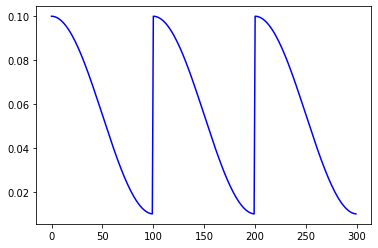

In [643]:
draw_x = np.arange(0, 300)
x = list(range(100)) + list(range(100)) + list(range(100))
y = list(map(lr_schedule_cosine(1e-2, 1e-1, 100), x))
plt.plot(draw_x, y, "b-")

In [723]:
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

classes = 10                  # 定义10个类别
batch_size = 512              # 定义每个批次的大小
lr_warm_up_alpha = 1e-2       # 定义warm up的起点值
lr_min = 1e-4                 # cosine学习率的最小值
lr_max = 1e-1                 # cosine学习率的最大值
epochs = 10                   # 退出策略，也就是最大把所有数据看10次
numdata, data_dims = train_images.shape  # 60000, 785

# 定义dataloader和dataset，用于数据抓取
train_data = DataLoader(Dataset(train_images, one_hot(train_labels, classes)), batch_size, shuffle=True) 

# 初始化theta参数，采用正态分布，大小是数据维度为行，类别数为列。kaiming
theta = np.random.normal(size=(data_dims, classes))
iters = 0   # 定义迭代次数，因为我们需要展示loss曲线，那么x将会是iters

# 定义warm up的参数，我们在开始值是0.01，1轮时为0.1，2轮时回归cosine学习率，所以是1
lr_warm_up_schedule = {
    1: 1e-1,
    2: 1
}

cosine_total_epoch = 3    # 定义cosine学习率的周期大小，固定为3.
cosine_itepoch = 0        # 定义cosine学习率的周期内epoch索引
lr_cosine_schedule = lr_schedule_cosine(lr_min, lr_max, cosine_total_epoch)   # 定义cosine学习率的函数，指定好参数
train_losses = []         # 定义train loss的收集变量，用于后面的绘图展示
val_losses = []           # 定义val loss的收集变量（accuracy，loss），用于后面的绘图展示

# 开始进行epoch循环，总数是epochs次
for epoch in range(epochs):
    
    # 如果cosine学习率的周期索引达到了周期的最后一次时，将其索引置位为0，相当于是周期性重启的意思
    if cosine_itepoch == cosine_total_epoch:
        cosine_itepoch = 0
    
    # 通过周期epoch索引来计算当前应该给定的学习率值
    lr_select = lr_cosine_schedule(cosine_itepoch)
    
    # 周期索引+1
    cosine_itepoch += 1
    
    # 如果当前的迭代次数在warm up计划改变的节点时。就修改warm up的alpha值为当前需要修改的值
    if epoch in lr_warm_up_schedule:
        lr_warm_up_alpha = lr_warm_up_schedule[epoch]
        
    # 定义最终的学习率，是等于cosine学习率 * warm_up_alpha
    lr = lr_select * lr_warm_up_alpha
    print(f"Set learning rate to {lr:.5f}")
    
    # 对一个批次内的数据进行迭代，每一次迭代都是一个batch（即256）
    for index, (images, labels) in enumerate(train_data):
        
        # 计算预测值
        predict = images @ theta  # n * 785    dot   785  * 10   =  n * 10
        
        # 转换为概率
        predict = sigmoid(predict)
        
        # 计算loss值
        loss = cross_entropy(predict, labels)

        # 计算theta的梯度
        d_theta = images.T @ (predict - labels)   #  785xn  dot  nx10  = 785 x 10
        
        # 更新theta。除以batch_size是为了求平均值
        theta = theta - lr * d_theta / batch_size
        iters += 1
        
        #记录当前的迭代信息和loss值，为后面展示做准备
        train_losses.append([iters, loss])

        if index % 100 == 0:
            print(f"Iter {iters}. {epoch} / {epochs}, Loss: {loss:.3f}, Learning Rate: {lr:.5f}")
        
    # 每一轮结束后，每把数据全看完一遍后，使用theta对测试数据集进行测试。来检验训练效果
    val_accuracy, val_loss = estimate_val(val_images, val_labels, theta, classes)
    
    # 记录val的loss和accuracy，用于后面展示
    val_losses.append([iters, val_accuracy, val_loss])
    print(f"Val set, Accuracy: {val_accuracy}, Loss: {val_loss}")

Set learning rate to 0.00100
Iter 1. 0 / 10, Loss: 30.645, Learning Rate: 0.00100


KeyboardInterrupt: 

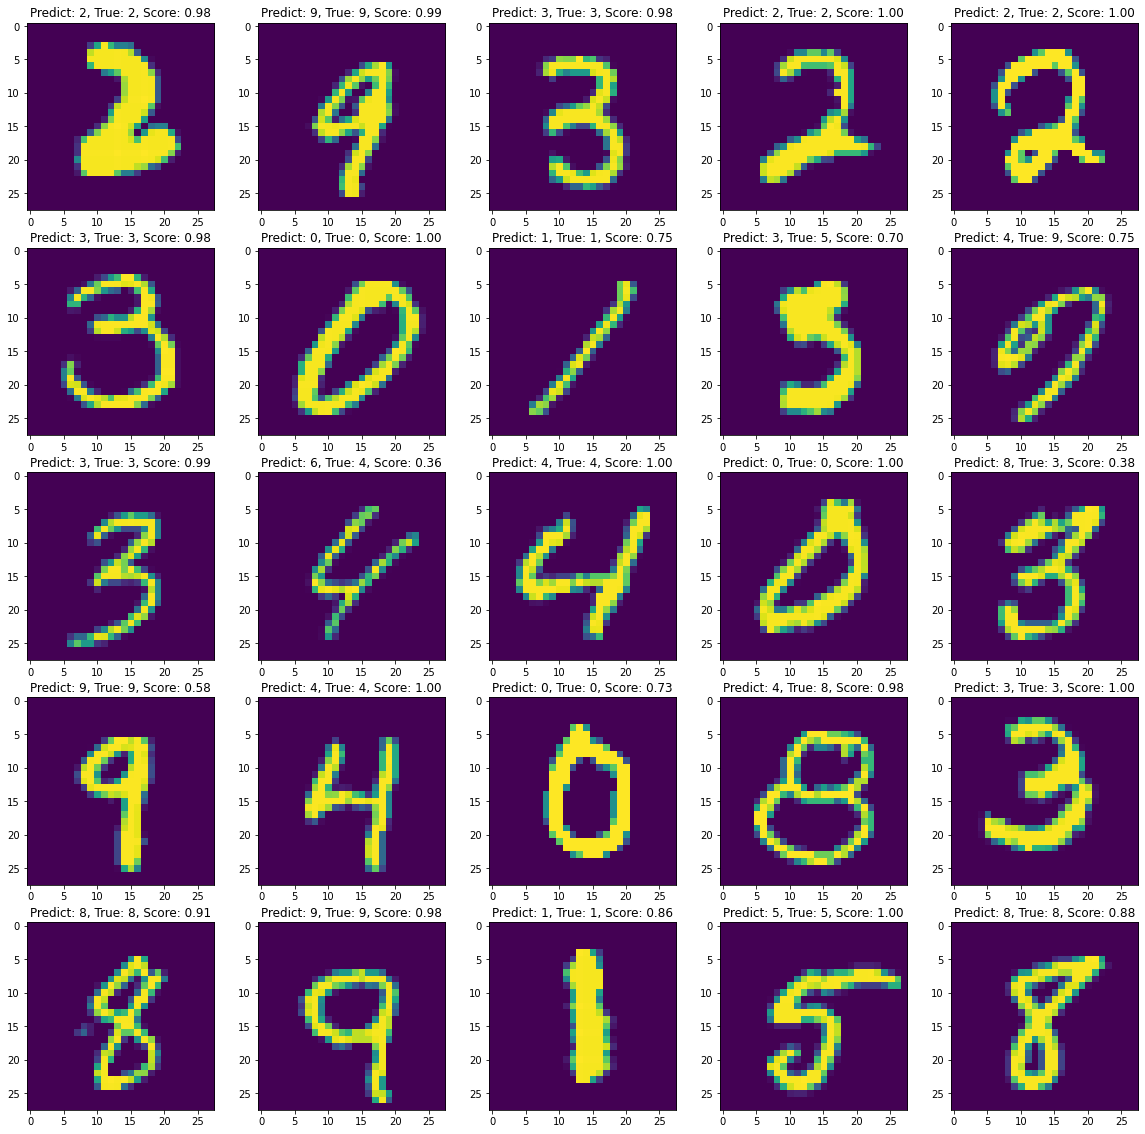

In [652]:
plt.figure(figsize=(20, 20))
idxs = list(range(val_images.shape[0]))
random.shuffle(idxs)
idxs = idxs[:25]
for index, image_index in enumerate(idxs):
    item = val_images[image_index]
    gt = val_labels[image_index]
    prob = sigmoid(item @ theta)
    plabel = np.argmax(prob)
    confidence = prob[plabel]
    image = item[:-1].reshape(28, 28)
    plt.subplot(5, 5, index + 1)
    plt.title(f"Predict: {plabel}, True: {gt}, Score: {confidence:.2f}")
    plt.imshow(image)  # cmap="gray"

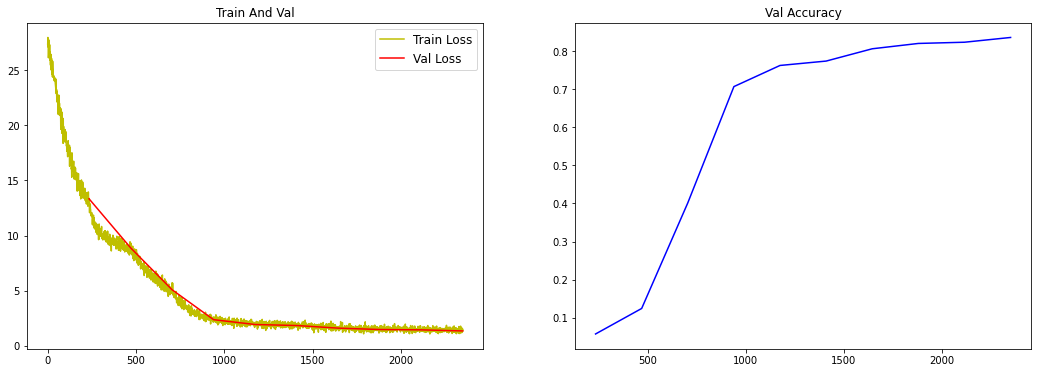

In [654]:
# 构建plots，获取到其中的ax
fig, (ax, _) = plt.subplots(1, 2, figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.title("Train And Val")
train_losses_np = np.array(train_losses)
val_losses_np = np.array(val_losses)
plt.plot(train_losses_np[:, 0], train_losses_np[:, 1], "y-")
plt.plot(val_losses_np[:, 0], val_losses_np[:, 2], "r-")
plt.legend(('Train Loss', 'Val Loss'), loc='upper right', fontsize="large")
ax.set_xlabel("Iter", fontsize="large")
ax.set_ylabel("Loss", fontsize="large")

# 对第二个图做绘图
plt.subplot(1, 2, 2)
plt.title("Val Accuracy")
plt.plot(val_losses_np[:, 0], val_losses_np[:, 1], "b-")

### 绘制混淆矩阵

In [693]:
all_predict = (val_images @ theta).argmax(1)
pd.crosstab(all_predict, val_labels, rownames=["predict"], colnames=["groundtruth"])

groundtruth,0,1,2,3,4,5,6,7,8,9
predict,,,,,,,,,,
0,910,0,28,15,2,25,19,6,17,10
1,1,1075,19,7,4,7,7,19,18,4
2,9,6,808,28,7,13,24,27,14,12
3,8,4,23,812,8,57,4,14,31,15
4,3,1,26,1,798,30,17,11,18,60
5,17,3,4,55,18,644,22,4,54,28
6,13,4,33,15,18,31,843,6,21,3
7,1,1,33,22,14,23,1,887,13,30
8,14,39,46,41,33,39,18,7,763,28


In [720]:
# precision, recall, accuracy, F1
alls = np.array([estimate(all_predict, val_labels, l) for l in range(10)])

reduce = 1
for v in alls[:, 0]:
    reduce *= v
    
#reduce
#np.sum(all_predict == val_labels) / all_predict.shape[0]
alls

array([[0.88178295, 0.92857143, 0.9808    , 0.90457256],
       [0.92592593, 0.94713656, 0.9854    , 0.93641115],
       [0.85232068, 0.78294574, 0.9636    , 0.81616162],
       [0.83196721, 0.8039604 , 0.9638    , 0.81772407],
       [0.82694301, 0.81262729, 0.9649    , 0.81972265],
       [0.75853946, 0.72197309, 0.9547    , 0.73980471],
       [0.85410334, 0.87995825, 0.9741    , 0.86683805],
       [0.86536585, 0.86284047, 0.9721    , 0.86410132],
       [0.7422179 , 0.78336756, 0.9524    , 0.76223776],
       [0.79591837, 0.81169475, 0.96      , 0.80372915]])

### 知识点总结
1. bytes数据转换到numpy，二进制数据读取，**以后常用**，使用np.asarray(bytearray())
2. bytes数据转换到基本类型，使用struct.unpack()其中<表示小端，>表示大端。如果<不行试试>就行了，不用记住他。这是网络字节序
3. 使用Dataset管理数据集
4. 使用DataLoader生成迭代器DataLoaderIterator，由DataLoaderIterator负责随机获取下一个样本，随机打乱的概念
    - GD(Gradient Descent)和SGD(Stochastic Gradient Descent)
5. epoch的概念
6. one_hot的概念
7. 数据归一化的概念，/ 255 - 0.5
8. loss曲线的概念，loss曲线可以使用类似TensorBoard来实现实时展示
9. 混淆矩阵的概念，通过混淆矩阵对数据进行分析
10. pandas的基本简单实用，DataFrame就类似excel的一个表格，可以通过不同函数实现统计绘图分析工作，而jupyter直接内置pandas和plot的可视化，很方便
    - pd.DataFrame
    - describe()
    - value_counts()
    - plot()
    - pd.crosstab()
11. 直方图的使用场景
12. matplotlib.pyplot的使用，以及多图的显示subplot，numpy的使用
13. 预弦退火学习率策略，warm-up策略

### 今日作业
1. 实现mnist数据的读取
2. 实现Dataset、DataLoader结构的类
3. 实现基于Epoch的迭代训练方式，使用逻辑回归对mnist数据集进行训练
4. 显示loss曲线图，验证精度accuracy图。展示每个类别的4项指标（precision, recall, accuracy, F1），这个课件中没有实现这一项工作哦。记住是每个类别的